In [0]:
!pip install torch

    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5a12e000 @  0x7fc0b05e52a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


Lets build a Simple Neural Network with pytorch

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [0]:
#import pytorch
import torch

In [0]:
#lets create the activation function (sigmoid activation function)
def activation (x):
  #note: the input x will be a tensor
  return 1/(1 + torch.exp(-x))

In [0]:
##Lets generate random data
torch.manual_seed(7) #set the random seed so that things are predictable

##5 random normal features
features = torch.randn((1, 5))

#true  weights for our data that are random
weights = torch.randn_like(features)

#true bias term
bias = torch.randn((1,1))

In [0]:
print (features)
print (weights)
print (bias)

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
tensor([[0.3177]])


In [0]:
# now, to form the simple neural network,

y = activation(torch.sum(features * weights) + bias )
print(y)
#or
y = activation((features * weights).sum() + bias )
print(y)

tensor([[0.1595]])
tensor([[0.1595]])


In [0]:
# we can also acheive this using matrix multiplication. but we have to resize the weight to prevent error
# you can use weights.resize_(a, b), weight.reshape(a,b), and weight.view(a,b). weight. view is advised bbecause the result does not tamper with the data
weights = weights.view(5, 1)

y = activation(torch.mm(features, weights) + bias) #or torch.matmul
print(y)

tensor([[0.1595]])


In [0]:
# Generate some data for a multi layer nn
torch.manual_seed(7)

#random features
features = torch.randn((1, 3))

#define the size of each layer
n_input = features.shape[1] # no of input unit = no of input features

n_hidden = 2

n_output = 1

#wiehgt for input to hidden layer
W1 = torch.randn((n_input, n_hidden))

#weight of hidden layer
W2 = torch.randn((n_hidden, n_output))

#bias for hidden and output layer

B1 = torch.randn((1, n_hidden))

B2 = torch.randn((1, n_output))





In [0]:
layer_1 = activation(torch.mm(features, W1) + B1)

layer_2 = torch.mm(layer_1, W2) + B2

y = activation(layer_2)

y

tensor([[0.3171]])

In [0]:
#converting btw numpy array and torch tensors

import numpy as np


In [0]:
a = np.random.rand(4, 3)

a

array([[0.85372244, 0.29591765, 0.24780362],
       [0.45034136, 0.46591312, 0.84390031],
       [0.74963355, 0.91989858, 0.25575832],
       [0.42662328, 0.71252705, 0.90332782]])

In [0]:
b = torch.from_numpy(a)
b

tensor([[0.8537, 0.2959, 0.2478],
        [0.4503, 0.4659, 0.8439],
        [0.7496, 0.9199, 0.2558],
        [0.4266, 0.7125, 0.9033]], dtype=torch.float64)

In [0]:
b.numpy()

array([[0.85372244, 0.29591765, 0.24780362],
       [0.45034136, 0.46591312, 0.84390031],
       [0.74963355, 0.91989858, 0.25575832],
       [0.42662328, 0.71252705, 0.90332782]])

In [0]:
#lets multiply the torch tensor by 2
b.mul_(2)
b

tensor([[1.7074, 0.5918, 0.4956],
        [0.9007, 0.9318, 1.6878],
        [1.4993, 1.8398, 0.5115],
        [0.8532, 1.4251, 1.8067]], dtype=torch.float64)

In [0]:
#array a will also be affected. ie memory is shared btw numpy array and torch tensor
a

array([[1.70744487, 0.59183529, 0.49560725],
       [0.90068271, 0.93182624, 1.68780062],
       [1.49926709, 1.83979717, 0.51151664],
       [0.85324656, 1.4250541 , 1.80665565]])

# Lets do some real neural network with MNIST **DATASET**

In [0]:
!pip install helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper
import matplotlib.pyplot as plt

In [0]:
# we will be using the mnist dataset. I think the dataset is in pytorch
#this cell downloads and runs the dataset
!pip install torchvision

#!pip install torchvision
import torch
from torchvision import datasets, transforms
import torchvision.transforms as transforms

#define a tranform to normiailze the data
# transform = transforms.Compose([tranforms.ToTensor(),
#                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                                ])

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# download and load the mnist dataset
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Processing...
Done!


**Train loader allows us iterate throught the MNIST dataset**

In [0]:
#for image, label in trainloader: do somoething
dataiter = iter(trainloader)
image, labels = dataiter.next()
print(type(image))
print(image.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


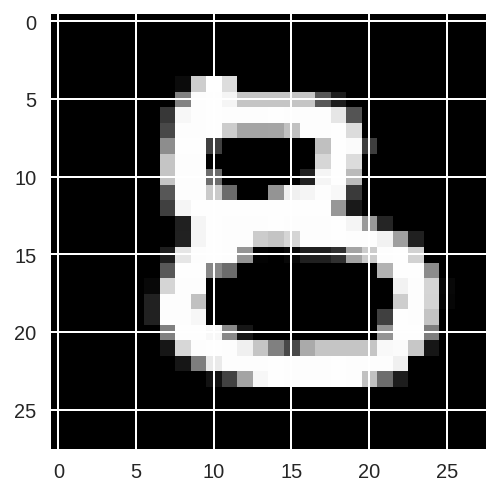

In [0]:
plt.imshow(image[1].numpy().squeeze(), cmap='Greys_r')

# **Now, building the network for the digit classifer**

In [0]:
def activation(x):
  return 1/(1 + torch.exp(-x))

In [0]:
#lets flatten the input images
inputs = image.view(image.shape[0], -1)
inputs.shape

torch.Size([64, 784])

In [0]:
torch.manual_seed(7)

n_input = 784

n_hidden = 256

n_output = 10

W1 = torch.randn((n_input, n_hidden))

W2 = torch.randn((n_hidden, n_output))

B1 = torch.randn((1, n_hidden))

B2 = torch.randn((1, n_output))

In [0]:
h = activation(torch.mm(inputs, W1) + B1)
h.shape

torch.Size([64, 256])

In [0]:
h_out = torch.mm(h, W2) + B2
print (h_out.shape)

torch.Size([64, 10])


In [0]:
#now, lets pass it thrugh softmax to get the prob 
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1) #dim=1 allows us take the sum across the columns
#.view(-1, 1) says for -1: for the equivalent row considered, in the 1st column

probabilities = softmax(h_out)

print(probabilities.shape)

print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


Now, lets build the neural network using the init module and torch methods

In [0]:
from torch import nn 

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    #input to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)
    
    #Output layer, 10 units - one for each digit 
    self.output = nn.Linear (256, 10)
    
    #define sigmoid and softmax function
    
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    #pass the input tensor thorugh each of our operation
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    return x
      

In [0]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
model.forward(inputs)

tensor([[0.1097, 0.1210, 0.1066, 0.1030, 0.0954, 0.0944, 0.0715, 0.1020, 0.0764,
         0.1199],
        [0.1050, 0.1139, 0.1106, 0.1116, 0.0976, 0.0873, 0.0694, 0.1056, 0.0805,
         0.1185],
        [0.1055, 0.1174, 0.1014, 0.1046, 0.0959, 0.0986, 0.0723, 0.1098, 0.0801,
         0.1144],
        [0.1054, 0.1259, 0.1100, 0.1030, 0.0951, 0.0914, 0.0708, 0.1133, 0.0723,
         0.1129],
        [0.1058, 0.1155, 0.1106, 0.1122, 0.0951, 0.0924, 0.0701, 0.1072, 0.0804,
         0.1107],
        [0.1020, 0.1205, 0.1063, 0.1099, 0.0977, 0.0966, 0.0677, 0.1097, 0.0791,
         0.1106],
        [0.1039, 0.1155, 0.1140, 0.1076, 0.0959, 0.0873, 0.0676, 0.1113, 0.0763,
         0.1206],
        [0.1052, 0.1116, 0.1128, 0.1037, 0.0966, 0.0925, 0.0669, 0.1049, 0.0778,
         0.1281],
        [0.1047, 0.1153, 0.1050, 0.1100, 0.0978, 0.0908, 0.0740, 0.1037, 0.0789,
         0.1198],
        [0.0981, 0.1270, 0.1162, 0.1054, 0.0883, 0.0981, 0.0614, 0.1140, 0.0771,
         0.1144],
        [0

NOW LETS BUILD A DEEPER NETWORK USING RELU

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden_1 = nn.Linear(784, 128)
    self.hidden_2 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)

    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()
    
  def Relu(self, x):
    return max(0, x)
      
  def forward(self, x):
    x = self.hidden_1(x)
    x = self.relu(x)    
    x = self.hidden_2(x)
    x = self.relu(x)    
    x = self.output(x)
    x = self.softmax(x)
    return x

In [0]:
model = Network()
model

Network(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax()
)

In [0]:
model(inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[0.1072, 0.0892, 0.1022, 0.0980, 0.1069, 0.1019, 0.0856, 0.0914, 0.1099,
         0.1077],
        [0.1152, 0.0869, 0.0981, 0.0898, 0.1104, 0.1015, 0.0912, 0.0861, 0.1071,
         0.1138],
        [0.1097, 0.0866, 0.1030, 0.0989, 0.1101, 0.0976, 0.0874, 0.0905, 0.1099,
         0.1064],
        [0.1072, 0.0872, 0.0934, 0.0930, 0.1068, 0.0976, 0.0900, 0.0935, 0.1155,
         0.1160],
        [0.1066, 0.0895, 0.0996, 0.0877, 0.1037, 0.0966, 0.0929, 0.0899, 0.1197,
         0.1138],
        [0.1084, 0.0863, 0.1006, 0.0938, 0.1089, 0.0996, 0.0910, 0.0895, 0.1078,
         0.1142],
        [0.1053, 0.0920, 0.1012, 0.0924, 0.1039, 0.0999, 0.0910, 0.0851, 0.1151,
         0.1141],
        [0.1017, 0.0871, 0.0989, 0.0946, 0.1079, 0.1029, 0.0952, 0.0841, 0.1136,
         0.1140],
        [0.1032, 0.0849, 0.1058, 0.0989, 0.1086, 0.0945, 0.0936, 0.0898, 0.1106,
         0.1101],
        [0.1116, 0.0942, 0.0966, 0.0910, 0.1055, 0.0969, 0.0831, 0.0921, 0.1115,
         0.1174],
        [0

NOW, LET CALCULAE CROSS ENTROPY LOSS. WE WILL USE NN.SEQUENTIAL FOR FASTER MODEL BUILDING

In [0]:
# we will be using the mnist dataset. I think the dataset is in pytorch
#this cell downloads and runs the dataset
!pip install torchvision

#!pip install torchvision
import torch
from torch import nn
from torchvision import datasets, transforms
import torchvision.transforms as transforms

#define a tranform to normiailze the data
# transform = transforms.Compose([tranforms.ToTensor(),
#                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                                ])
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# download and load the mnist dataset
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [0]:
#building the feedforward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

# defining the loss
criterion = nn.CrossEntropyLoss()

#Get the data
images, labels = next(iter(trainloader))

#flatten images
images = images.view(images.shape[0], -1) # or images.view(image.shape[0], 784)

# forward pass, get our logits
logit = model(images)

loss = criterion(logit, labels)

print(loss) # this is the cross-entropy loss

tensor(2.3054, grad_fn=<NllLossBackward>)


In [0]:
#now, lets estimate the actual probability by the taking the exponent torch.exp(loss)
######confirm if this is correct
#building the feedforward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))
                     


#Get the data
images, labels = next(iter(trainloader))

#flatten images
images = images.view(images.shape[0], -1) # or images.view(image.shape[0], 784)

# forward pass, get our logits
logit = model(images)

print(torch.sum(torch.exp(logit), dim=1)) 

tensor([10.0910, 10.1556, 10.2580, 10.0344, 10.1820, 10.4994, 10.4959, 10.1678,
        10.3701, 10.2183, 10.3252, 10.2085, 10.0436, 10.4166, 10.1223, 10.3653,
        10.1525, 10.2601, 10.1413, 10.3403, 10.3168, 10.3659, 10.2248, 10.3532,
        10.1959, 10.5928, 10.0587, 10.3399, 10.1809, 10.2990, 10.2109, 10.1128,
        10.4850, 10.5144, 10.3668, 10.1261, 10.1131, 10.1703, 10.2077, 10.0374,
        10.3119, 10.1669, 10.4046, 10.0540, 10.2979, 10.2392,  9.9482, 10.3441,
        10.3169, 10.0473, 10.2988, 10.3500, 10.1274, 10.4191, 10.2568, 10.2214,
        10.3306, 10.3166, 10.3917, 10.2984, 10.1317, 10.1524, 10.1873, 10.1339],
       grad_fn=<SumBackward1>)


In [0]:
# Now, according to the tutorial, we can use LogSoftmax as follows to get the log and softmax

#building the feedforward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
                    

# defining the loss
criterion = nn.NLLLoss() #negative log-likelihood loss

#Get the data
images, labels = next(iter(trainloader))

#flatten images
images = images.view(images.shape[0], -1) # or images.view(image.shape[0], 784)

# forward pass, get our logits
log_probability = model(images)

loss = criterion(log_probability, labels)

print(loss) # this is the cross-entropy loss

tensor(2.2965, grad_fn=<NllLossBackward>)


AUTOGRAD (AUTO GRADIENT)

In [0]:
#Prove this mathematically
#the function .backward() tracks the gradient backward. for example

x = torch.randn((2,2), requires_grad = True)
print(x)

tensor([[-0.4915,  0.0679],
        [ 1.0011, -0.0203]], requires_grad=True)


In [0]:
y = x**2
print(y)
print(y.grad_fn)

tensor([[0.2416, 0.0046],
        [1.0022, 0.0004]], grad_fn=<PowBackward0>)


In [0]:
#z = torch.mean(y) #or
z = y.mean()
print(z)

tensor(0.3122, grad_fn=<MeanBackward1>)


In [0]:
print(x.grad)# it is none because we havent calculated the gradient

None


In [0]:
# now, lets find the gradient backward. ie dz/dx
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.2458,  0.0340],
        [ 0.5005, -0.0102]])
tensor([[-0.2458,  0.0340],
        [ 0.5005, -0.0102]], grad_fn=<DivBackward0>)


LOSS AND AUTOGRAD TOGETHER

In [0]:
#Lets try this backwar pass with our previous network

#building the feedforward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
                    

# defining the loss
criterion = nn.NLLLoss() #negative log-likelihood loss

#Get the data
images, labels = next(iter(trainloader))

#flatten images
images = images.view(images.shape[0], -1) # or images.view(image.shape[0], 784)

# forward pass, get our logits
log_probability = model(images)

loss = criterion(log_probability, labels)


In [0]:
print("Before backward pass: \n", model[0].weight.grad) #model[0] refers to the first layer (nn.Linear(784, 128))

loss.backward()

print("After backward pass: \n", model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0038, -0.0038, -0.0038,  ..., -0.0038, -0.0038, -0.0038],
        [-0.0084, -0.0084, -0.0084,  ..., -0.0084, -0.0084, -0.0084],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [-0.0071, -0.0071, -0.0071,  ..., -0.0071, -0.0071, -0.0071],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


But how to we use these gradients to optimise our weights

In [0]:
# we will use pytorch optimisers. we could stocastic gradient descent (optim.SGD)
# for example

from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.01) #where lr is the learning rate

In [0]:
#now, lets train one step
print ('inital weight = ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784) #flatten the image

#Clear the previously generated gradient because gradients are accumulated
optimizer.zero_grad()

#forward pass then backward pass then update weight
output = model.forward(images)
loss = criterion(output, labels)

loss.backward()

print("Gradient = ", model[0].weight.grad)

inital weight =  Parameter containing:
tensor([[ 0.0071, -0.0196,  0.0190,  ..., -0.0304,  0.0179,  0.0320],
        [-0.0304,  0.0305, -0.0137,  ...,  0.0113,  0.0259, -0.0251],
        [-0.0342, -0.0325, -0.0129,  ...,  0.0082,  0.0295, -0.0347],
        ...,
        [-0.0094,  0.0345, -0.0274,  ..., -0.0133,  0.0006,  0.0330],
        [ 0.0006,  0.0356, -0.0269,  ...,  0.0109,  0.0053, -0.0206],
        [-0.0100,  0.0077, -0.0280,  ...,  0.0123,  0.0257, -0.0078]],
       requires_grad=True)
Gradient =  tensor([[ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010]])


In [0]:
#take an update step to update the weights
optimizer.step()
print("Update weights = ", model[0].weight)

Update weights =  Parameter containing:
tensor([[ 0.0071, -0.0196,  0.0190,  ..., -0.0305,  0.0178,  0.0320],
        [-0.0304,  0.0305, -0.0137,  ...,  0.0113,  0.0259, -0.0251],
        [-0.0342, -0.0325, -0.0129,  ...,  0.0082,  0.0296, -0.0347],
        ...,
        [-0.0093,  0.0345, -0.0274,  ..., -0.0133,  0.0006,  0.0330],
        [ 0.0006,  0.0356, -0.0269,  ...,  0.0109,  0.0053, -0.0206],
        [-0.0100,  0.0077, -0.0280,  ...,  0.0123,  0.0257, -0.0078]],
       requires_grad=True)


CLASS WORK LETS TRAIN WITH MULTPLE STEPS

In [0]:
#building the feedforward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
                    

# defining the loss
criterion = nn.NLLLoss() #negative log-likelihood loss
optimizer = optim.SGD(model.parameters(), lr = 0.03) #where lr is the learning rate
epochs = 5

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    
    #flatten images
    images = images.view(images.shape[0], -1) # or images.view(image.shape[0], 784)
    
    optimizer.zero_grad()
    
    # forward pass, get our logits
    log_probability = model(images) #or output = model.forward(images)

    
    loss = criterion(log_probability, labels)
    
    loss.backward()
    
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")
    


Training Loss: 0.6069350083118309
Training Loss: 0.2777405214954668
Training Loss: 0.21222881767859084
Training Loss: 0.17022348124224113
Training Loss: 0.14247178787123294


In [0]:
# now, lets pass in an image to see what the network is predicting
%matplotlib inline
#!pip install helper

#from google.colab import files
#src = list(files.upload().values())[0]
#open('helper.py','wb').write(src)

#!wget "https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/helper.py"

import helpers
import torch.nn.functional as F

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

#lets turn off the gradients

with torch.no_grad():
  logits = model.forward(img)

#Output of the network are logits, need to take softmax of probabilities

ps = F.softmax(logits, dim=1)

#ps = nn.LogSoftmax(logits)

helpers.view_classify(img.view(1, 28, 28), ps)

ModuleNotFoundError: ignored